# Hyperparameter tuning

## Part 1: Manual Hyperparameter Tuning
>Objective: Manually tune hyperparameters of a neural network and observe the impact on model performance.

### Setup
Start with the necessary imports and dataset preparation. We'll use the MNIST dataset for this exercise, as it's complex enough to demonstrate the effects of hyperparameter tuning.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.reshape(-1, 784) / 255.0, X_test.reshape(-1, 784) / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)


2023-12-03 16:54:59.172435: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


MNIST dataset is originally 28x28 greyscale images. Flattened = (28*28=784)<br>
Divide by 255 to normalize RGB values (from 0-255 to 0.0-1.0)<br>

[keras.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) # One hot encoding for each target integer (0-9)

In [5]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
# as such

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]



## Task: Manual Tuning of Hyperparameters
1. Build a Base Model: Create a simple neural network as a starting point.
2. Manual Tuning: Experiment by manually changing hyperparameters like learning rate, number of layers/neurons, and activation functions.
3. Training and Evaluation: Train the model with different hyperparameter settings and evaluate its performance.

In [27]:
from tensorflow.keras.optimizers import Adam
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import time
import sys

def build_model(hyperparams):
    model = Sequential()
    model.add(Dense(hyperparams['layers'][0], input_dim=784, activation='relu'))

    for units in hyperparams['layers'][1:]:
        model.add(Dense(units, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=hyperparams['learning_rate'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
layer_configs = [(32, 32), (64, 64), (128, 128)]

def train_and_test_model(learning_rates=learning_rates,layer_configs=layer_configs, plot=True):
    results = []
    for lr in tqdm(learning_rates, desc='Learning Rates', leave=False):
        for layers in tqdm(layer_configs, desc='Layer Configurations', leave=False):

            hyperparams = {'learning_rate': lr, 'layers': layers}

            model = build_model(hyperparams)

            start_time = time.time()
            history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
            end_time = time.time()

            test_loss, test_acc = model.evaluate(X_test, y_test)

            results.append({
                'Learning Rate': lr,
                'Layers': str(layers),
                'Test Accuracy': test_acc,
                'Test Loss': test_loss,
                'Training Time': end_time - start_time
            })

    df = pd.DataFrame(results)

    if plot:
        fig_accuracy = px.bar(df, x='Layers', y='Test Accuracy', color='Learning Rate',
                            title='Test Accuracy for Hyperparameters on MNIST',
                            labels={'Test Accuracy': 'Accuracy', 'Layers': 'Layer Configuration'})

        fig_loss = px.bar(df, x='Layers', y='Test Loss', color='Learning Rate',
                        title='Test Loss Hyperparameters on MNIST',
                        labels={'Test Loss': 'Loss', 'Layers': 'Layer Configuration'})

        fig_accuracy.show()
        fig_loss.show()

    return df

In [28]:
df = train_and_test_model()

Learning Rates:   0%|          | 0/5 [00:00<?, ?it/s]

313/313 [==============================] - 1s 1ms/step - loss: 0.1184 - accuracy: 0.9669


313/313 [==============================] - 1s 1ms/step - loss: 0.0927 - accuracy: 0.9703


313/313 [==============================] - 1s 1ms/step - loss: 0.0848 - accuracy: 0.9749


Learning Rates:  20%|██        | 1/5 [00:55<03:40, 55.14s/it]

313/313 [==============================] - 1s 1ms/step - loss: 0.1749 - accuracy: 0.9584


313/313 [==============================] - 1s 1ms/step - loss: 0.1530 - accuracy: 0.9614


313/313 [==============================] - 1s 1ms/step - loss: 0.1872 - accuracy: 0.9570


Learning Rates:  40%|████      | 2/5 [01:48<02:41, 53.82s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.6487 - accuracy: 0.8378


313/313 [==============================] - 1s 1ms/step - loss: 0.5152 - accuracy: 0.8859


313/313 [==============================] - 1s 2ms/step - loss: 0.9254 - accuracy: 0.6734


Learning Rates:  60%|██████    | 3/5 [02:43<01:49, 54.59s/it]

313/313 [==============================] - 1s 1ms/step - loss: 2.0614 - accuracy: 0.1962


313/313 [==============================] - 1s 1ms/step - loss: 1.9073 - accuracy: 0.2210


313/313 [==============================] - 1s 1ms/step - loss: 2.3085 - accuracy: 0.0974


Learning Rates:  80%|████████  | 4/5 [03:40<00:55, 55.39s/it]

313/313 [==============================] - 1s 1ms/step - loss: 2.3925 - accuracy: 0.0980


313/313 [==============================] - 1s 1ms/step - loss: 2.3883 - accuracy: 0.0980


313/313 [==============================] - 1s 1ms/step - loss: 2.3265 - accuracy: 0.0980


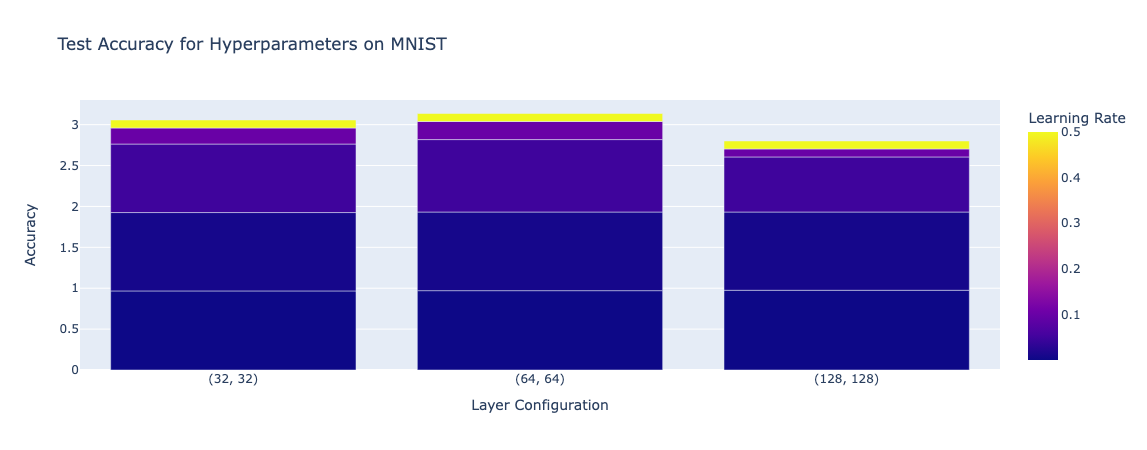
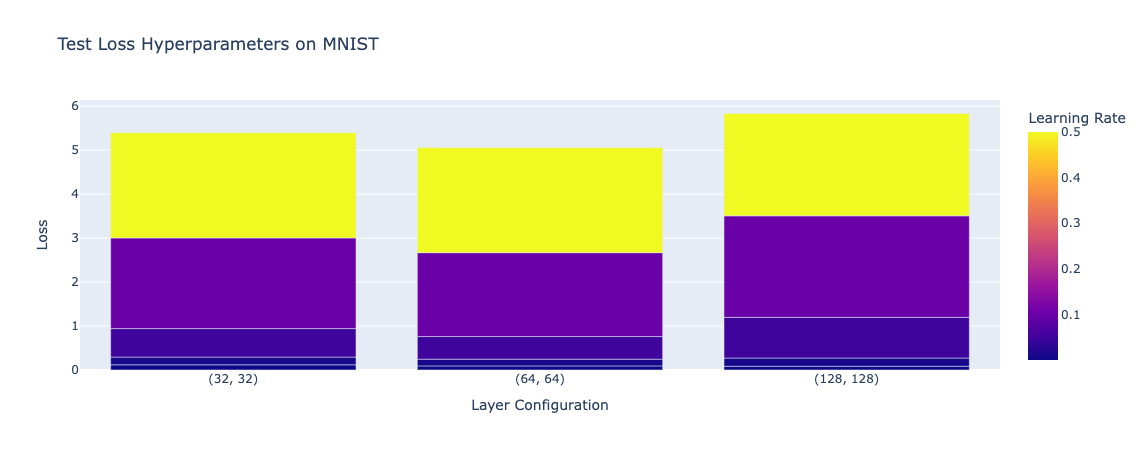

## Analysis and Questions
* How did different learning rates affect the training process and model accuracy?
* What impact did varying the number of layers and neurons have on the model's performance?
* Were there any combinations of hyperparameters that resulted in particularly good or poor performance?


In [30]:
df # TODO

,Learning Rate,Layers,Test Accuracy,Test Loss,Training Time
0,0.001,"(32, 32)",0.9669,0.118352,17.871008
1,0.001,"(64, 64)",0.9703,0.092685,15.713837
2,0.001,"(128, 128)",0.9749,0.084827,19.190325
3,0.010,"(32, 32)",0.9584,0.174883,14.472610
4,0.010,"(64, 64)",0.9614,0.153013,15.923013
5,0.010,"(128, 128)",0.9570,0.187192,20.133306
6,0.050,"(32, 32)",0.8378,0.648680,16.248391
7,0.050,"(64, 64)",0.8859,0.515196,17.201522
8,0.050,"(128, 128)",0.6734,0.925400,19.237648
9,0.100,"(32, 32)",0.1962,2.061442,16.451149


------------------------------
## Part 2: Automated Hyperparameter Tuning
### Objective
Use automated methods like Grid Search and Random Search for hyperparameter tuning.

### Setup
Reuse the MNIST dataset setup from Part 2.

### Task: Automated Hyperparameter Tuning
1. Grid Search and Random Search: Introduce and apply Grid Search and Random Search using scikit-learn's GridSearchCV or RandomizedSearchCV.
2. Integration with Keras: Show how to use these methods with Keras models.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

# Define a function to create a model (for KerasClassifier)
def create_model_to_search(hyperparams):
    # Create a Keras model with hyperparameters
    pass  # Replace with your code

# Set up GridSearchCV or RandomizedSearchCV
model_to_search = KerasClassifier(build_fn=create_model_to_search)
param_grid = {
    # Define a grid of hyperparameters to search
}
grid = GridSearchCV(estimator=model_to_search, param_grid=param_grid)

# Run grid search
grid_result = grid.fit(X_train, y_train)


## Visualization
Visualize the performance of the best model found by the search methods.
## Analysis and Questions
* Compare the results of manual tuning with automated tuning. Which method gave better results?
* What are the advantages and limitations of using automated methods like Grid Search and Random Search?



# Further explorations

For this dataset, I don't think the greyscale is needed. We will try to increase the contrast of the image until only black and white remains.
Effectively making any pixel either 0 or 1.